# Using `pymf6`

We can achieve the same effect with `pymf6`.

In [1]:
from modflowapi import Callbacks as states
from xmipy.errors import XMIError

from pymf6.mf6 import MF6
from pymf6.api import create_mutable_bc

from helpers import plot

We set up some initial data:

In [2]:
h_mean = 320.0
name = 'rivercond'
flux = []
chd = []

Now, we create an instance of `MF6`, get a reference to the flow model and the model loop:

In [3]:
mf6 = MF6(name)
gwf = mf6.models['gwf6']
loop = mf6.model_loop()

We create a mutable river boundary condition and get the initial value of the river conductance:

In [4]:
riv = create_mutable_bc(gwf.riv)
condref = riv.cond[0]

Now, we can loop over all time steps, modified the conductance and collect the flux values in both cells:

In [5]:
for model in loop:
    if model.state == states.iteration_start:
        if gwf.X[0, 0, 0] > h_mean:
            riv.cond = condref
        else:
            riv.cond = condref * 0.10
    elif model.state == states.timestep_end:
        flux.append(mf6.sim_values.river[0])
        chd.append(mf6.sim_values.chd_0[0])

NORMAL TERMINATION OF SIMULATION


The results are the same:

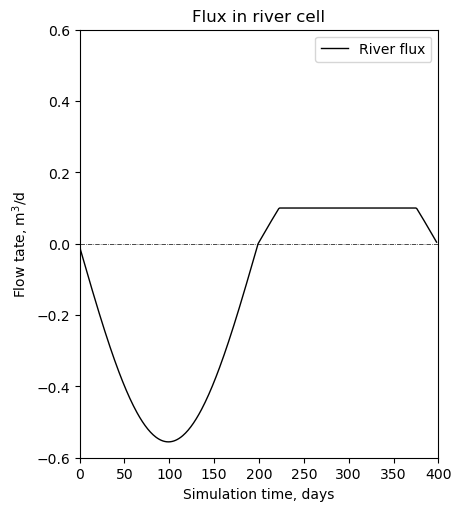

In [6]:
plot(flux);

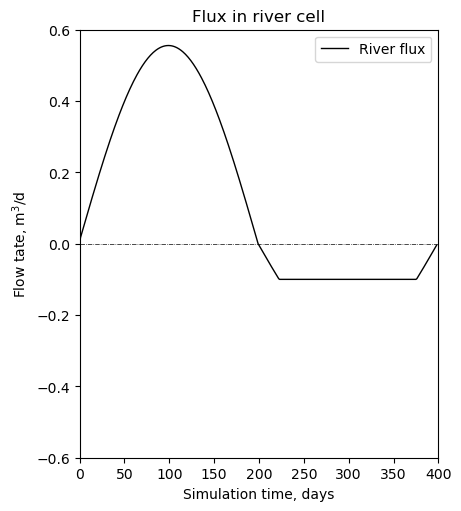

In [7]:
plot(chd);